<a href="https://colab.research.google.com/github/kaneelgit/stock-data/blob/main/stock_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 44 kB/s 
     |████████████████████████████████| 459 kB 52.3 MB/s 
     |████████████████████████████████| 20.1 MB 53.2 MB/s 
     |████████████████████████████████| 2.9 MB 54.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.0+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.1 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [15]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 506), reused 1388 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 21.08 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

Checking out files: 100% (2554/2554), done.


In [16]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 8.2 MB 29.2 MB/s 
     |████████████████████████████████| 206 kB 63.1 MB/s 
     |████████████████████████████████| 15.7 MB 32.7 MB/s 
     |████████████████████████████████| 280 kB 50.2 MB/s 
     |████████████████████████████████| 99 kB 8.1 MB/s 
     |████████████████████████████████| 38.1 MB 221 kB/s 
     |████████████████████████████████| 234 kB 50.0 MB/s 
     |████████████████████████████████| 4.2 MB 31.3 MB/s 
     |████████████████████████████████| 1.1 MB 36.9 MB/s 
     |████████████████████████████████| 352 kB 48.6 MB/s 
     |████████████████████████████████| 1.2 MB 48.9 MB/s 
     |████████████████████████████████| 11.2 MB 44.7 MB/s 
     |████████████████████████████████| 47.7 MB 79 kB/s 
     |████████████████████████████████| 596 kB 63.5 MB/s 
     |████████████████████████████████| 4.3 MB 49.4 MB/s 
     |████████████████████████████████| 76 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |█████████████

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [2]:
#get csv file
df = pd.read_csv('https://raw.githubusercontent.com/kaneelgit/stock-data/main/dataset_news.csv')

#delete the unnamed column
del df['Unnamed: 0']
df.head(5)

,NEWS,DATE,TICKER,SP1,SP2,SP5,SP10,W1_2,W2_2,W5_2,W10_2,W1_5,W1_10,W2_5,W2_10,W5_5,W5_10,W10_5,W10_10
0,City's deal with Loews rides wave of Mid-South...,2020-03-11 15:43:00,L,39.73,37.01,33.42,31.26,0,0,0,0,0,0,0,0,0,0,0,0
1,"Engine No 1, the giant-killing hedge fund, has...",2021-06-02 20:00:00,XOM,61.18,61.45,61.05,61.05,1,1,1,1,0,0,0,0,0,0,0,0
2,Is Target Unstoppable After Another Big Earnin...,2021-05-25 10:36:00,TGT,225.30,227.37,227.27,231.34,1,1,1,1,1,2,1,2,1,1,1,1
3,Tesla champion Ark Investment outguns Wall Str...,2021-01-31 19:00:00,STT,70.25,71.60,74.77,72.92,2,1,1,1,2,2,2,2,2,1,1,1
4,Here's Why NVIDIA Stock Jumped Today,2021-05-28 19:28:00,NVDA,649.78,650.58,678.79,704.76,1,1,1,1,2,2,2,2,1,2,1,1


<AxesSubplot:ylabel='Frequency'>

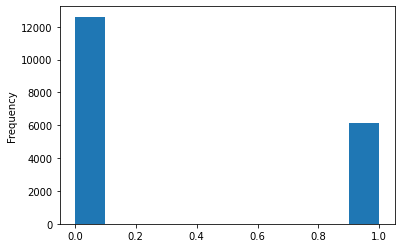

In [3]:
#df new
df2 = df[['NEWS', 'W5_10']]

# #change values
def change_target(x):
  if x == 2:
    x = 1
  
  return x

# df2['target'] = df2['W5_10'].apply(change_target)

# #new dataframe
# data = df2[['NEWS', 'target']]


# #Plot
# plt.plot('gains and losses after ')

data = df2[(df2['W5_10'] == 0) | (df2['W5_10'] == 2)].reset_index(drop = True)
data['target'] = data['W5_10'].apply(change_target)
dataset = data[['NEWS', 'target']]
dataset
dataset['target'].plot(kind = 'hist')

In [4]:
#create tensorflow datasets
train_df, remaining = train_test_split(dataset, random_state = 42, train_size = 0.8, stratify = dataset.target.values)
valid_df, _ = train_test_split(remaining, random_state = 42, train_size = 0.8, stratify = remaining.target.values)

train_df.shape, valid_df.shape

((14992, 2), (2999, 2))

In [5]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['NEWS'].values, train_df['target'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['NEWS'].values, valid_df['target'].values))

  for text, label in train_data.take(1):
    print(text)
    print(label)


tf.Tensor(b"What's in Store for International Flavors' (IFF) Q3 Earnings?", shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)


In [6]:
#getting BERT 

label_list = [0, 1]
max_seq_length = 128
train_batch_size = 32

bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4', trainable = True)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokernizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

